<a href="https://colab.research.google.com/github/quincynjoroge/MAIZE-CROP-DISEASE-IMAGE-CLASSIFICATION/blob/dev-branch/Maize_Leaf_Image_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#mounting drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#Import albumentation library
import albumentations as A

#Library to read images from disk
import cv2
import cv2
from matplotlib import pyplot as plt

### Define an augmentation pipeline

To define an augmentation pipeline, you need to create an instance of the Compose class. As an argument to the Compose class, you need to pass a list of augmentations you want to apply. A call to Compose will return a transform function that will perform image augmentation.

In [3]:
# Creating an instance of the Compose class.
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [5]:
# To read an image with OpenCV
image = cv2.imread("/content/drive/MyDrive/MOG/DATA/head smut/114 Corn Smut Photos - Free & Royalty... (1).jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
#Define the visualization function
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

### Pass images to the augmentation pipeline and receive augmented images

In [7]:
#call the transform function created by a call to A.Compose
transformed = transform(image=image)

In [8]:
#transform will return a dictionary with a single key image. Value at that key will contain an augmented image.
transformed_image = transformed["image"]

In [9]:
#To augment the next image, you need to call transform again and pass a new image as the image argument:
another_transformed_image = transform(image=transformed_image)["image"]

In [10]:
transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0),
])
transformed_image_1 = transform(image=image)['image']
transformed_image_2 = transform(image=image)['image']
transformed_image_3 = transform(image=image)['image']

In [11]:
transformed_image_3

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [15, 21,  0],
        [15, 21,  0],
        [15, 21,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [15, 21,  0],
        [15, 21,  0],
        [15, 21,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [15, 21,  0],
        [15, 21,  0],
        [15, 21,  0]],

       ...,

       [[37, 34,  0],
        [37, 34,  0],
        [36, 34,  0],
        ...,
        [48, 39,  0],
        [50, 41,  0],
        [51, 42,  0]],

       [[39, 33,  0],
        [38, 33,  0],
        [38, 34,  0],
        ...,
        [48, 39,  0],
        [49, 41,  0],
        [50, 42,  0]],

       [[39, 33,  0],
        [39, 34,  0],
        [39, 34,  0],
        ...,
        [48, 38,  0],
        [49, 40,  0],
        [50, 42,  0]]], dtype=uint8)

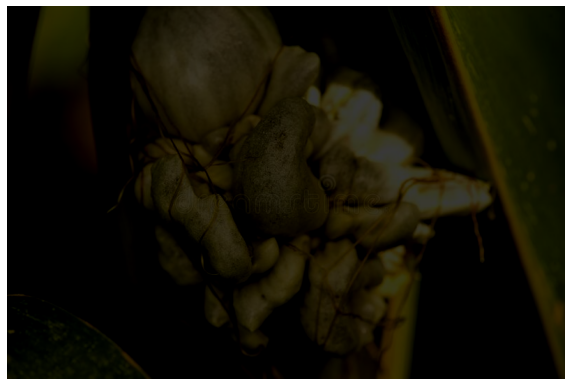

In [12]:
visualize(transformed_image_1)

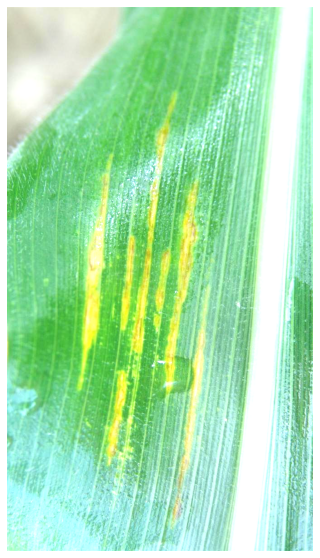

In [ ]:
visualize(transformed_image_2)

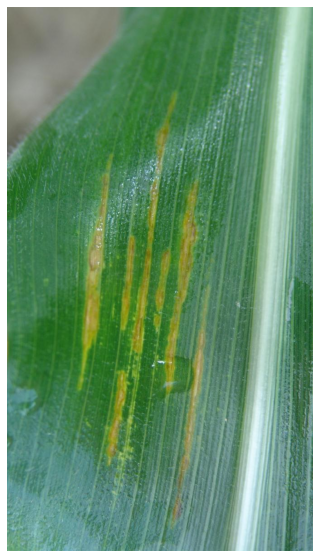

In [ ]:
visualize(image)

Augment and save to dir

In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# img = load_img('/content/drive/MyDrive/MOG/DATA/maize streak/Bacterial Leaf Streak _ CropWatch.jpg')  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir='/content/drive/MyDrive/MOG/DATA/preview', save_prefix='gls', save_format='jpeg'):
#     i += 1
#     if i > 10:
#         break  # otherwise the generator would loop indefinitely

In [ ]:
# img = load_img('/content/drive/MyDrive/MOG/DATA/maize streak/Bacterial Leaf Streak _ CropWatch.jpg')  # this is a PIL image
# x = img_to_array(img)
# x = x.reshape((1,) + x.shape)
# x.shape

(1, 1200, 675, 3)

In [10]:
#libraries for loading images
from pathlib import Path
import pathlib
import PIL
import PIL.Image

#path to get document from drive.
p = Path("/content/drive/MyDrive/MOG/DATA") 

# downloading our dataset

data_dir= pathlib.Path(p)
data_dir

PosixPath('/content/drive/MyDrive/MOG/DATA')

In [11]:
#Import Pandas
import pandas as pd

#Loading the images into a pandas dataframe
data = pd.DataFrame(columns=['Image_path', 'Disease'])
smut = list(data_dir.glob('head smut/*'))
data.Image_path = list(data_dir.glob('head smut/*'))
data['Disease'] = 'smut'

####blight =list(data_dir.glob('Northern Blight/*'))
blight = pd.DataFrame(columns=['Image_path', 'Disease']) 
blight.Image_path = list(data_dir.glob('Northern Blight/*'))
blight['Disease'] = 'blight'  

#####streak = list(data_dir.glob('maize streak/*'))
streak = pd.DataFrame(columns=['Image_path', 'Disease']) 
streak.Image_path = list(data_dir.glob('maize streak/*'))
streak['Disease'] = 'streak'

#####df.healthy = list(data_dir.glob('healthy/*'))
healthy = pd.DataFrame(columns=['Image_path', 'Disease']) 
healthy.Image_path = list(data_dir.glob('healthy/*'))
healthy['Disease'] = 'healthy' 

####df.common_rust = list(data_dir.glob('Common_rust/*'))
common_rust = pd.DataFrame(columns=['Image_path', 'Disease']) 
common_rust.Image_path = list(data_dir.glob('Common_rust/*'))
common_rust['Disease'] = 'common_rust' 

#####.Grey_leaf = list(data_dir.glob('Gray Leaf Spot/*'))
Grey_leaf = pd.DataFrame(columns=['Image_path', 'Disease']) 
Grey_leaf.Image_path = list(data_dir.glob('Gray Leaf Spot/*'))
Grey_leaf['Disease'] = 'Grey_leaf' 

#concat
df = pd.concat([data, blight,streak,healthy,common_rust,Grey_leaf], axis=0, ignore_index=True)

#Preview the dataframe
df.head()

,Image_path,Disease
0,/content/drive/MyDrive/MOG/DATA/head smut/Head...,smut
1,/content/drive/MyDrive/MOG/DATA/head smut/Head...,smut
2,/content/drive/MyDrive/MOG/DATA/head smut/Head...,smut
3,/content/drive/MyDrive/MOG/DATA/head smut/Corn...,smut
4,/content/drive/MyDrive/MOG/DATA/head smut/Head...,smut


In [12]:
data.head()

,Image_path,Disease
0,/content/drive/MyDrive/MOG/DATA/head smut/Head...,smut
1,/content/drive/MyDrive/MOG/DATA/head smut/Head...,smut
2,/content/drive/MyDrive/MOG/DATA/head smut/Head...,smut
3,/content/drive/MyDrive/MOG/DATA/head smut/Corn...,smut
4,/content/drive/MyDrive/MOG/DATA/head smut/Head...,smut


In [13]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
data['image_array'] = ''
smut = []
for i in range(len(data)):
  data['image_array'] = load_img(data.Image_path[i])
  for i in range(83):
    smut.append(data.image_array[i])
    #smut[i] = img_to_array(data.image_array[i])
    #smut[i]= smut[i].reshape((1,) + x.shape)


In [18]:
for i in range(83):
  smut[i] = img_to_array(smut[i])

  

In [19]:
for i in range(83):
  smut[i]= smut[i].reshape((1,) + smut[i].shape)

smut[2].shape

(1, 768, 1024, 3)

In [21]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

for i in range(3):
  i = 0
  for batch in datagen.flow(smut[i], batch_size=1,
                            save_to_dir='/content/drive/MyDrive/MOG/DATA/head_smut_augment', save_prefix='gls', save_format='jpeg'):
      i += 1
      if i > 10:
         break  # otherwise the generator would loop indefinitely


### all 175

In [14]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
data['image_array'] = ''
smut = []
for i in range(len(data)):
  data['image_array'] = load_img(data.Image_path[i])
  for i in range(175):
    smut.append(data.image_array[i])
    #smut[i] = img_to_array(data.image_array[i])
    #smut[i]= smut[i].reshape((1,) + x.shape)


In [15]:
for i in range(175):
  smut[i] = img_to_array(smut[i])

In [16]:
for i in range(175):
  smut[i]= smut[i].reshape((1,) + smut[i].shape)

smut[2].shape

(1, 768, 1024, 3)

In [17]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

for i in range(175):
  i = 0
  for batch in datagen.flow(smut[i], batch_size=175,
                            save_to_dir='/content/drive/MyDrive/MOG/DATA/head_smut_augment', save_prefix='gls', save_format='jpeg'):
      i += 1
      if i > 10:
         break  # otherwise the generator would loop indefinitely
